In [46]:
# pyscience imports
import os
import sys
import glob
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-darkgrid")
# plt.style.use("dark_background")
sns.set(style="ticks", context="talk")
# %matplotlib inline
# run for jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [47]:
%pwd
years = list(range(1951, 1996, 1))
colorder = ['year', 'club', 'played', 'home_w', 'home_d', 'home_l', 'home_f', 'home_a', 
'away_w', 'away_d', 'away_l', 'away_f', 'away_a', 'pts' , 'n_teams']
epl_renames = {
    'Team': 'club',
    'Played': 'played',
    'Pts': 'pts'
}

'/home/alal/Dropbox/1_Research/league-tables-scraper'

In [48]:
english_league = []
scottish_league = []
for s in years:
    # english league
    try:
        r = pd.read_csv('english_league_tables/english_league_' + str(s) + '.csv')
        r['n_teams'] = len(r)
        r.rename(columns = epl_renames, inplace=True)
        r = r[colorder]
        english_league.append(r)
    except:
        print('English League ' + str(s) + ' league table not found')
    # scottish league
    try:
        r = pd.read_csv('scottish_league_tables/scottish_league_' + str(s) + '.csv')
        r['n_teams'] = len(r)
        r = r[colorder]
        scottish_league.append(r)
    except:
        print('Scottish League ' + str(s) + ' league table not found')

In [49]:
spl_series = pd.concat(scottish_league)
spl_series = spl_series[[c for c in spl_series.columns if not c.startswith('Unnamed')]]
spl_series.head()

,year,club,played,home_w,home_d,home_l,home_f,home_a,away_w,away_d,away_l,away_f,away_a,pts,n_teams
0,1951,Hibernian,30.0,13,1,1.0,44.0,9.0,9.0,3.0,3.0,34.0,17.0,48.0,16
1,1951,Rangers,30.0,10,3,2.0,36.0,13.0,7.0,1.0,7.0,28.0,24.0,38.0,16
2,1951,Dundee,30.0,11,3,1.0,32.0,12.0,4.0,5.0,6.0,15.0,18.0,38.0,16
3,1951,Hearts,30.0,10,3,2.0,46.0,17.0,6.0,2.0,7.0,26.0,28.0,37.0,16
4,1951,Aberdeen,30.0,9,2,4.0,35.0,21.0,6.0,3.0,6.0,26.0,29.0,35.0,16


In [50]:
epl_series = pd.concat(english_league)
epl_series = epl_series[[c for c in epl_series.columns if not c.startswith('Unnamed')]]
epl_series['year'] = 1900 + epl_series.year
epl_series.year.unique()

array([1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995])

In [51]:
spl_series['goals'] = spl_series.home_f + spl_series.away_f
epl_series['goals'] = epl_series.home_f + epl_series.away_f
spl_series['goals_permatch'] = spl_series.goals / spl_series.played
epl_series['goals_permatch'] = epl_series.goals / epl_series.played

In [52]:
scotlandgoals = spl_series[['year','goals_permatch']].groupby('year').mean()
englandgoals = epl_series[['year','goals_permatch']].groupby('year').mean()

In [58]:
ts = pd.concat([scotlandgoals, englandgoals], axis=1)
ts.columns = ['scotland_goals_per_match', 'england_goals_per_match']
ts.reset_index(inplace=True)
ts.head()

,year,scotland_goals_per_match,england_goals_per_match
0,1951,1.731250,1.529221
1,1952,1.850000,1.612554
2,1953,1.985417,1.632035
3,1954,1.885417,1.661255
4,1955,1.795833,1.701299


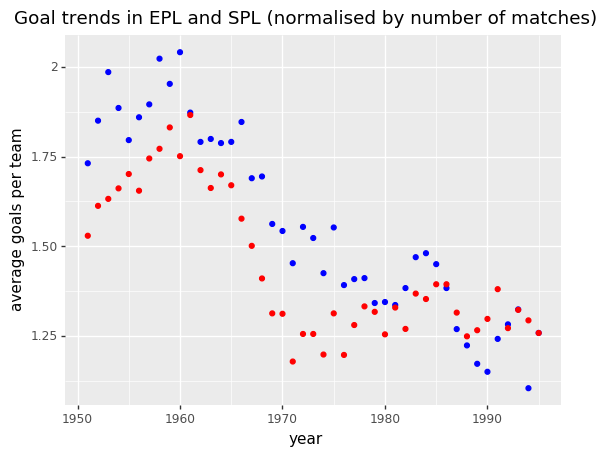

<ggplot: (8784425193613)>

In [57]:
ggplot(ts, aes(x='year')) +\
    geom_point(aes(y='scotland_goals_per_match'), colour='Blue') +\
    geom_point(aes(y='england_goals_per_match'), colour='Red') +\
    labs(y = 'average goals per team', 
         title = 'Goal trends in EPL and SPL (normalised by number of matches)')